In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
sns.set()

# Data cleaning

In [2]:
df = pd.read_csv('data.csv', 
                 na_values=['n/a'])

In [3]:
df.head()

,date,address,house type,number of rooms,number of floors,house size,price
0,18.07.2019,דיה 27,קוטג' דו משפחתי,6.0,קרקע+ראשונה,128.20,"1,770,000"
1,12.07.2019,גמלא 23,קוטג' טורי,4.0,קרקע ראשונה,125.71,"1,625,000"
2,10.07.2019,ביתניר 21,דירה בביתקומות,3.0,קרקע,85.60,"2,655,000"
3,30.06.2019,חיטה 50,קוטג' חד משפחתי,6.0,NaN,200.00,"1,970,000"
4,24.06.2019,חצב 56,קוטג' דו משפחתי,5.5,קרקע + ראשונה,218.30,"2,600,000"


In [4]:
df.isnull().sum()

date                  1
address              38
house type            0
number of rooms       0
number of floors    146
house size            1
price                 1
dtype: int64

In [5]:
counter = 0
l = []
for i,r in df.iterrows():
    if df.loc[i].isnull().sum(axis=0) >= 2:
        counter+=1
        l.append(i)
    

print (f'There are {counter} rows with 2 or more null values')
df.drop(l,axis=0,inplace=True)
df.isnull().sum()

There are 33 rows with 2 or more null values


date                  0
address               6
house type            0
number of rooms       0
number of floors    113
house size            0
price                 0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 372 entries, 0 to 403
Data columns (total 7 columns):
date                372 non-null object
address             366 non-null object
house type          372 non-null object
number of rooms     372 non-null float64
number of floors    259 non-null object
house size          372 non-null float64
price               372 non-null object
dtypes: float64(2), object(5)
memory usage: 23.2+ KB


In [7]:
df.date = pd.to_datetime(df.date)

lprice = []

for i in df.price:
    i = i.replace(",","")
    lprice.append(i)


df.price = lprice
df.price = df.price.astype('float64')
    

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 372 entries, 0 to 403
Data columns (total 7 columns):
date                372 non-null datetime64[ns]
address             366 non-null object
house type          372 non-null object
number of rooms     372 non-null float64
number of floors    259 non-null object
house size          372 non-null float64
price               372 non-null float64
dtypes: datetime64[ns](1), float64(3), object(3)
memory usage: 23.2+ KB


In [9]:
df.drop(['number of floors','house type'],axis=1,inplace=True)
df.address.fillna('missing',axis=0,inplace=True)

In [10]:
df.isnull().sum()

date               0
address            0
number of rooms    0
house size         0
price              0
dtype: int64

In [11]:
df.head()

,date,address,number of rooms,house size,price
0,2019-07-18,דיה 27,6.0,128.20,1770000.0
1,2019-12-07,גמלא 23,4.0,125.71,1625000.0
2,2019-10-07,ביתניר 21,3.0,85.60,2655000.0
3,2019-06-30,חיטה 50,6.0,200.00,1970000.0
4,2019-06-24,חצב 56,5.5,218.30,2600000.0


In [12]:
df['street_name'] = df['address'].apply(lambda x:x.split(" ",1)[0])

df['house_number'] = df['address'].apply(lambda x:x.split(" ",1)[-1])

df.head()


,date,address,number of rooms,house size,price,street_name,house_number
0,2019-07-18,דיה 27,6.0,128.20,1770000.0,דיה,27
1,2019-12-07,גמלא 23,4.0,125.71,1625000.0,גמלא,23
2,2019-10-07,ביתניר 21,3.0,85.60,2655000.0,ביתניר,21
3,2019-06-30,חיטה 50,6.0,200.00,1970000.0,חיטה,50
4,2019-06-24,חצב 56,5.5,218.30,2600000.0,חצב,56


In [13]:
ah = ('א','ב','ג','ד','ה')

def street_classifier(data):
    for i in data:
        if i.startswith(ah):
            i = 0
        else:
            i = 1
    return i


df['street_classifier'] = df['street_name'].apply(street_classifier)

df.head()


,date,address,number of rooms,house size,price,street_name,house_number,street_classifier
0,2019-07-18,דיה 27,6.0,128.20,1770000.0,דיה,27,0
1,2019-12-07,גמלא 23,4.0,125.71,1625000.0,גמלא,23,0
2,2019-10-07,ביתניר 21,3.0,85.60,2655000.0,ביתניר,21,1
3,2019-06-30,חיטה 50,6.0,200.00,1970000.0,חיטה,50,0
4,2019-06-24,חצב 56,5.5,218.30,2600000.0,חצב,56,0


# EDA


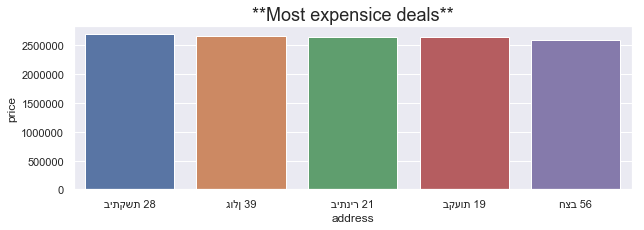

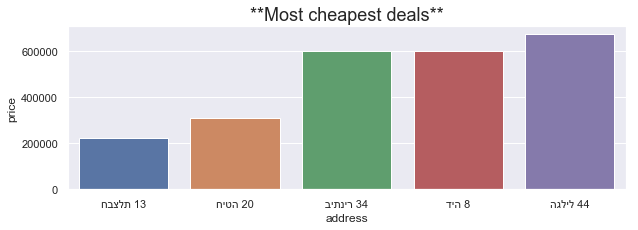

In [14]:
#most expensive/cheap deals

exp = df.sort_values('price',ascending = False).head(5)
che = df.sort_values('price',ascending = True).head(5)


plt.figure(figsize=(10,3))
plt.title('**Most expensice deals**',size=18)
sns.barplot(x='address',y='price',data=exp)


plt.figure(figsize=(10,3))
plt.title('**Most cheapest deals**',size=18)
sns.barplot(x='address',y='price',data=che)



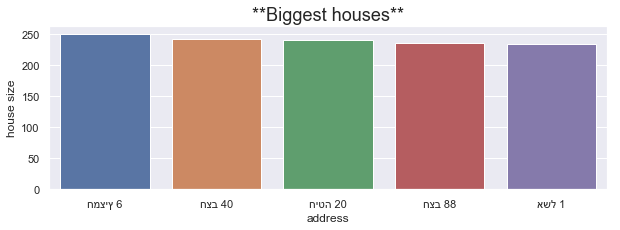

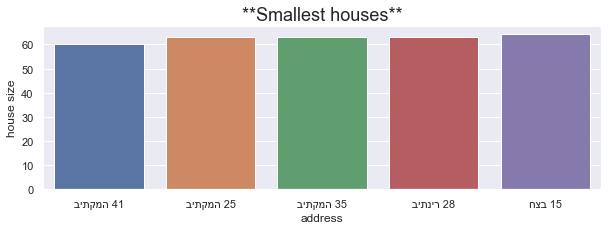

In [15]:


#biggest & smallest apartments

lg = df.sort_values('house size',ascending = False).head(10)
mask = lg.address != 'missing'
lg = lg[mask]

sm = df.sort_values('house size',ascending = True).head(5)


plt.figure(figsize=(10,3))
plt.title('**Biggest houses**',size=18)
sns.barplot(x='address',y='house size',data=lg)


plt.figure(figsize=(10,3))
plt.title('**Smallest houses**',size=18)
sns.barplot(x='address',y='house size',data=sm)


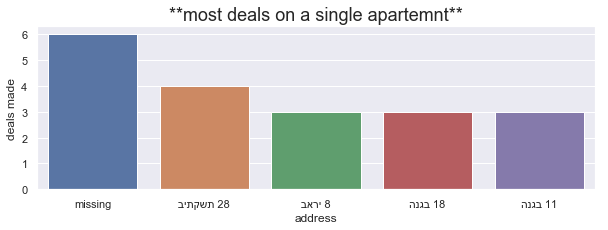

In [16]:
#most deals on a single apartemnt 

most_deals = df.address.value_counts().to_frame().head(5).reset_index()

most_deals = most_deals.rename(columns = {'index':'address',
                                         'address':'deals made'})

plt.figure(figsize=(10,3))
plt.title('**most deals on a single apartemnt**',size=18)
sns.barplot(x='address',y='deals made',data=most_deals)


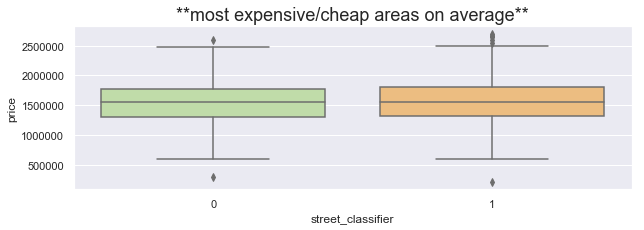

In [17]:
#distribution of the most expensive/cheap areas 
exp_area = df[['street_classifier','price']]

plt.figure(figsize=(10,3))
plt.title('**most expensive/cheap areas on average**',size=18)
sns.boxplot(x='street_classifier',y='price',data=exp_area,palette='Spectral_r')

C:\Users\Amit Aizenkot Moyal\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


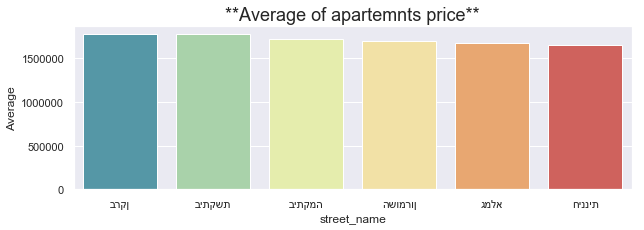

In [18]:
#average of price by streets
s = df[['street_name','price']]
s.set_index(keys=['street_name'],inplace=True)
s.sort_index(inplace=True)

grouped_address_count = s.groupby(['street_name']).count()
grouped_address_count.columns = ['count_hs']


summed_values = s.groupby(['street_name']).sum()
summed_values.columns = ['sum_hs']


result = grouped_address_count.join(summed_values)
result['Average'] = result['sum_hs']/result['count_hs']
result = result.sort_values(by='Average',ascending = False).reset_index().head(6)



plt.figure(figsize=(10,3))
plt.title('**Average of apartemnts price**',size=18)
sns.barplot(x='street_name',y='Average',data=result,palette='Spectral_r')

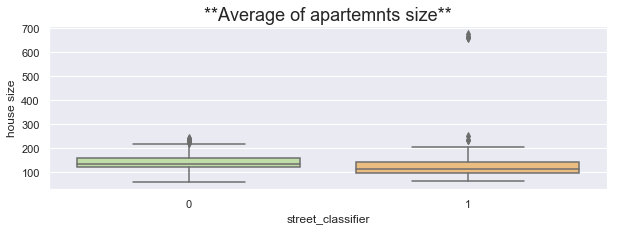

In [19]:
#distribution of the apartemnts size by areas
exp_area = df[['street_classifier','house size']]

plt.figure(figsize=(10,3))
plt.title('**Average of apartemnts size**',size=18)
sns.boxplot(x='street_classifier',y='house size',data=exp_area,palette='Spectral_r')

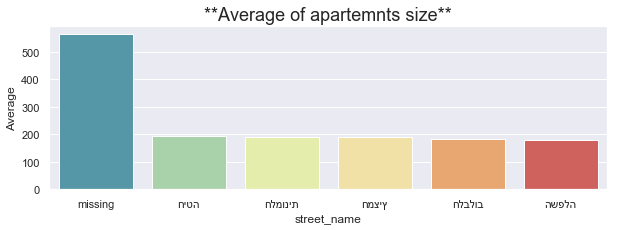

In [20]:
#average of apartemnts size by streets
s = df[['street_name','house size']]

grouped_address_count = s.groupby(['street_name']).count()
grouped_address_count.columns = ['count_hs']


summed_values = s.groupby(['street_name']).sum()
summed_values.columns = ['sum_hs']


result = grouped_address_count.join(summed_values)
result['Average'] = result['sum_hs']/result['count_hs']
result = result.sort_values(by='Average',ascending = False).reset_index().head(6)



plt.figure(figsize=(10,3))
plt.title('**Average of apartemnts size**',size=18)
sns.barplot(x='street_name',y='Average',data=result,palette='Spectral_r')